**GROUP PROJECT PROPOSAL**


# **Predicting Heart Disease Using DATA SCIENCE**
#### ARYAN JAIN, KATIE LIANG, MADILYN PORTAS, VIBHAV

## INTRODUCTION

Heart disease, also known as cardiovascular disease, encompasses various heart conditions arising from issues in the heart and blood vessels. One such condition is coronary artery disease, which occurs when the arteries that supply blood to the heart become narrowed. There are several risk factors associated with the development of this disease, such as high blood pressure levels and the maximum heart rate a person can achieve. Additionally, age plays a significant role, as older individuals are more susceptible to being diagnosed with heart disease.

The objective of this project is to utilize these risk factors to categorize patients based on their likelihood of having heart disease.

The central question we aim to address is: Can we predict whether a new patient is prone to heart disease based on their age, blood pressure levels, and maximum heart rate achieved?

To accomplish this, we will employ the Heart Disease dataset from Hungary, which comprises 76 attributes, including age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, and other variables. It is important to note that this dataset may contain missing values.

## METHOD

We are using the Heart Disease Database to predict whether patients have heart disease. The dataset has 303 observations and includes 14 numerical variables. Some values in the dataset are missing and are represented as "?".

Here are the key variables in the dataset:

- "age": This represents the patient's age in years.
- "sex": It indicates the patient's gender, where 1 stands for male and 0 for female.
- "cp": This variable describes the type of chest pain the patient is experiencing, with values ranging from 1 to 4.
- "trestbps": This measures the patient's resting blood pressure in millimeters of mercury (mmHg).
- "chol": It represents the patient's serum cholesterol level in milligrams per deciliter (mg/dl).
- "fbs": This variable indicates whether the patient has fasting blood sugar levels greater than 120 mg/dl, with 1 for "True" and 0 for "False."
- "restecg": This describes the results of the patient's resting electrocardiogram, with values of 0, 1, or 2.
- "thalach": It measures the maximum heart rate the patient achieved.
- "exang": This variable indicates whether the patient experiences exercise-induced angina, with 1 for "True" and 0 for "False."
- "oldpeak": It represents ST depression induced by exercise relative to rest.
- "slope": This variable characterizes the slope of the peak exercise ST segment with values of 1, 2, or 3.
- "ca": It signifies the number of major vessels colored by fluoroscopy, ranging from 0 to 3.
- "thal": This variable describes the patient's thalassemia status with values of 3, 6, or 7.
- "num": It signifies the diagnosis of heart disease, with 0 meaning no presence and values from 1 to 4 indicating different levels of presence.

To simplify our analysis, we introduced a new binary variable called "diag" to indicate whether a patient has heart disease, based on the "num" variable. We also handled missing values by replacing "?" with "NA."

We divided the dataset into a 75% training set and a 25% testing set using "initial_split," with a focus on ensuring both sets have a similar distribution of "diag."

We explored the data by grouping it based on "diag" and calculated the minimum, maximum, and average values for "age," "trestbps," and "thalach." This helped us observe that patients with heart disease tend to have higher "age" and "trestbps" values, but lower "thalach" values compared to those without heart disease.

We created visualizations by plotting various numerical variables against each other, coloring the data points based on "diag." These plots helped us identify the most important predictors for our model. Notably, we noticed distinct patterns in plots like "age" vs. "trestbps," "age" vs. "thalach," and "trestbps" vs. "thalach," which reinforced our prior research findings.

As a result, we selected "age," "trestbps," and "thalach" as the key predictor variables for our analysis.

In [130]:
#Importing Libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(dplyr)

In [131]:
# Reading the data
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_data <- read_csv("data/processed.hungarian.data", col_names = column_names)

# Cleaning and wrangling data
heart_data[heart_data == "?"] <- NA

heart_clean <- heart_data |>
  mutate(
    diag = ifelse(is.na(num), NA, (num > 0)),
    trestbps = as.factor(as.integer(trestbps)),
    chol = as.factor(as.integer(chol)),
    fbs = as.factor(as.integer(fbs)),
    thalach = as.factor(as.integer(thalach)),
    exang = as.factor(as.integer(exang)),
    slope = as.factor(as.integer(slope)),
    ca = as.factor(as.integer(ca)),
    thal = as.factor(as.integer(thal))
  )

# Splitting the data
heart_split <- initial_split(heart_clean, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

# Display the first few rows of the training data
head(heart_training)


Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0,FALSE
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0,FALSE
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0,FALSE
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0,FALSE
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0,FALSE
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0,FALSE


In [132]:
#creating the summary

heart_summary <- heart_training |>
  group_by(diag) |>
  summarize(
    min_age = min(age),
    max_age = max(age),
    mean_age = mean(age),
    min_trestbps = min(as.numeric(trestbps)),
    max_trestbps = max(as.numeric(trestbps)),
    mean_trestbps = mean(as.numeric(trestbps)),
    min_thalach = min(as.numeric(thalach)),
    max_thalach = max(as.numeric(thalach)),
    mean_thalach = mean(as.numeric(thalach)),
    n_of_patients = n()
  )

heart_summary


diag,min_age,max_age,mean_age,min_trestbps,max_trestbps,mean_trestbps,min_thalach,max_thalach,mean_thalach,n_of_patients
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,28,62,47.01418,NA,NA,NA,NA,NA,NA,141
TRUE,32,66,49.70886,1,29,18.89873,1,67,30.36709,79


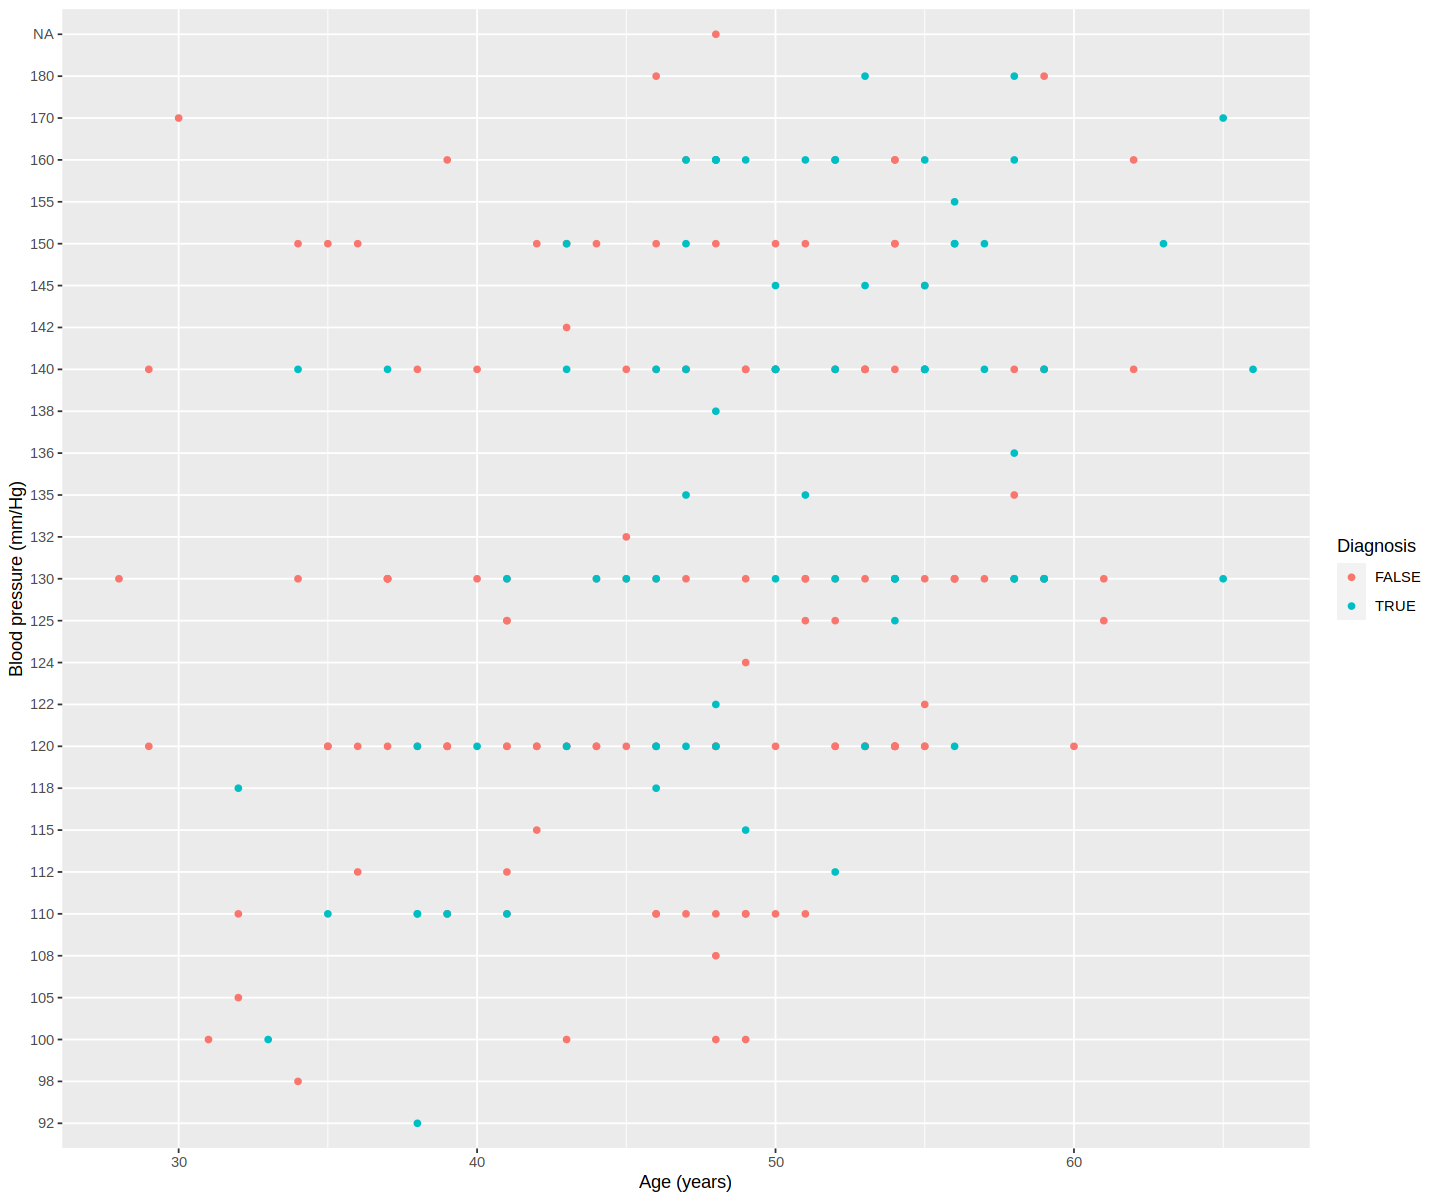

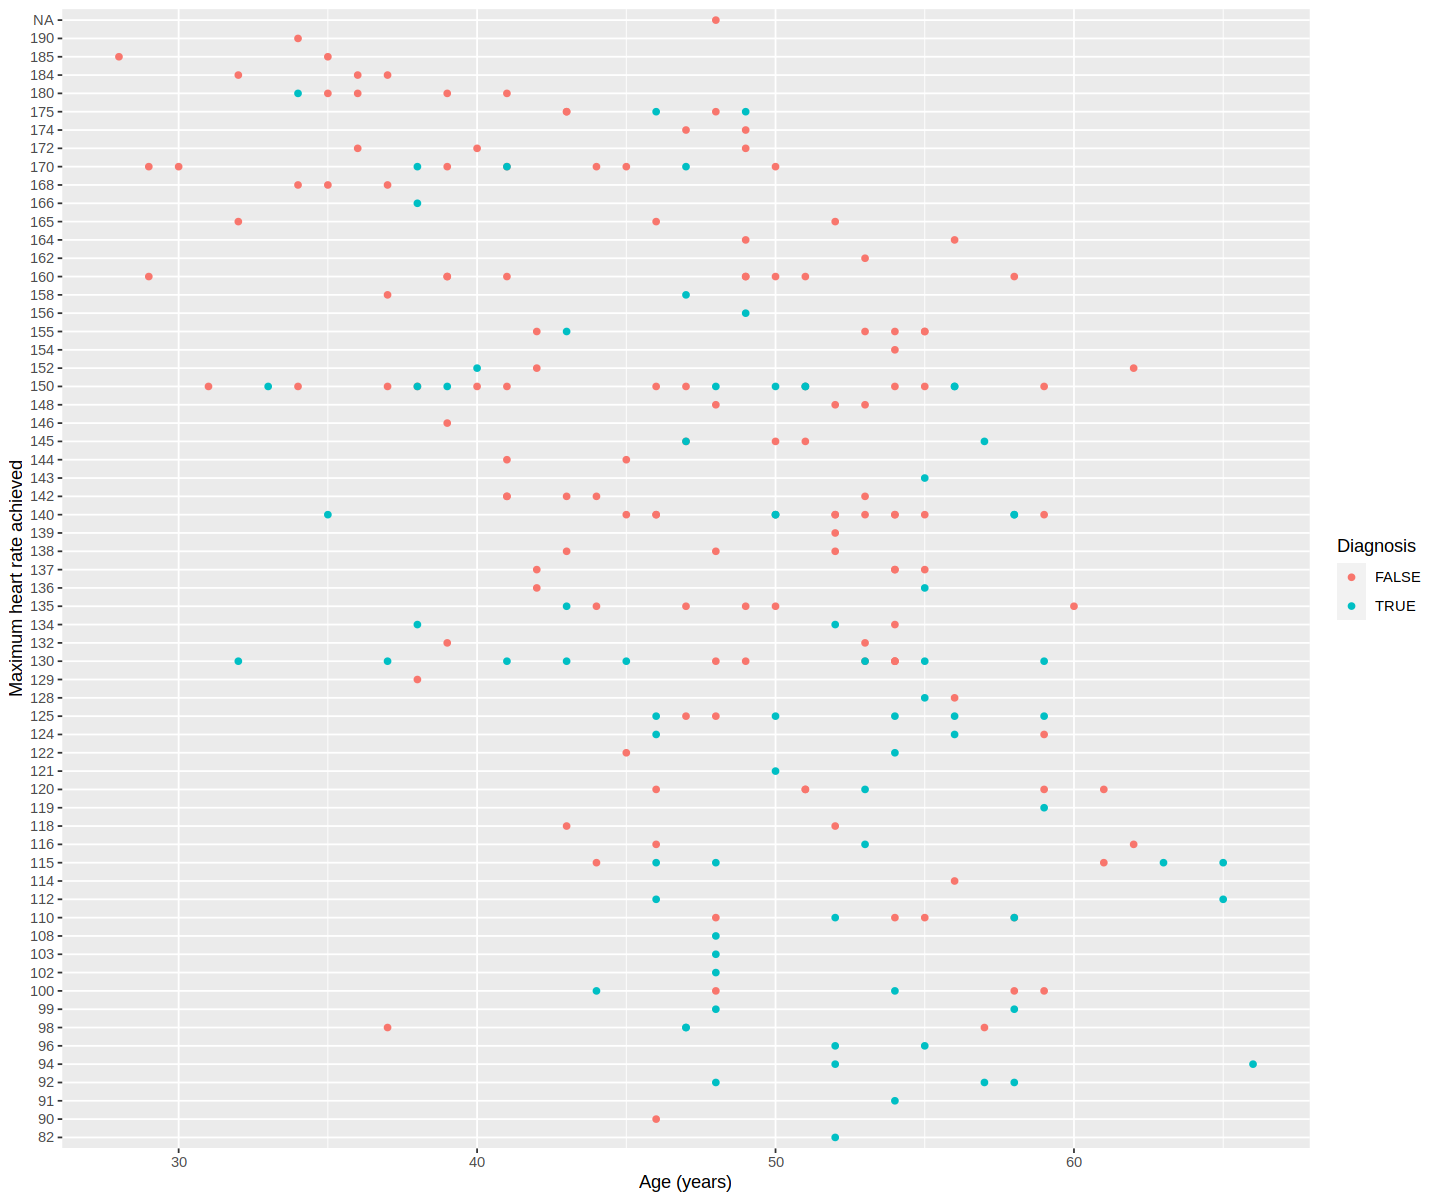

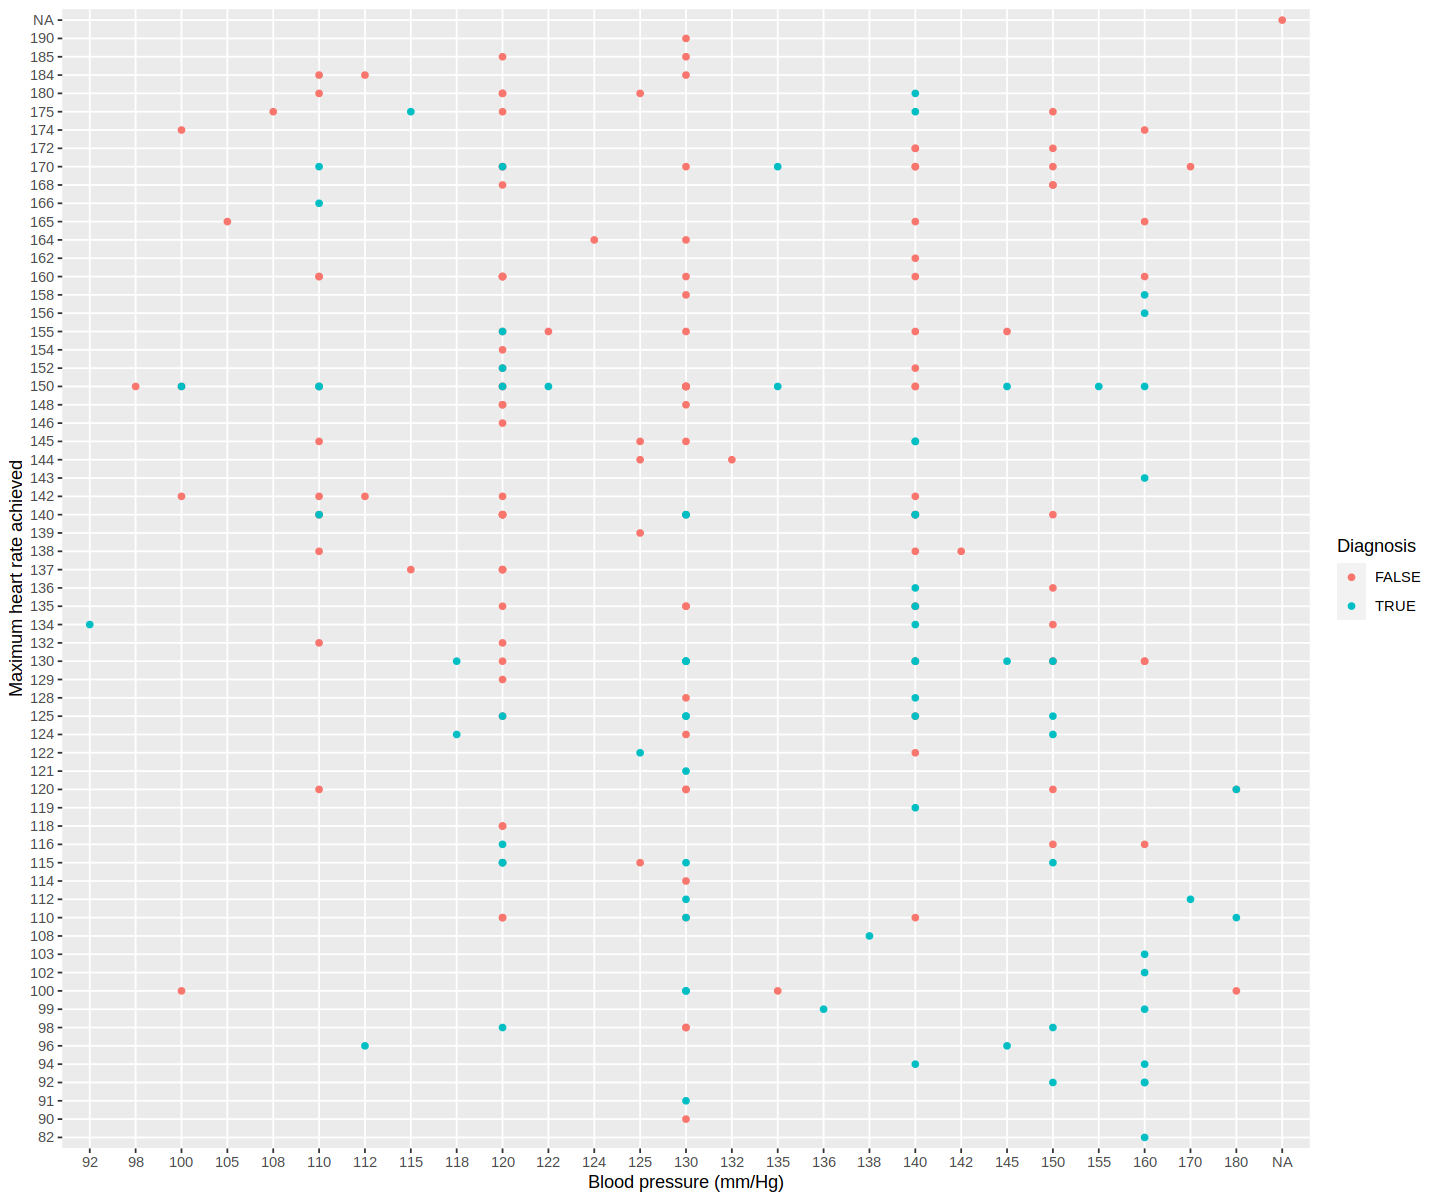

In [133]:
#plotting the training data
plot_1 <- ggplot(heart_training, aes(x = age, y = trestbps, color = diag)) +
          geom_point() +
          labs (x = "Age (years)", y = "Blood pressure (mm/Hg)", color = "Diagnosis")
plot_1

plot_2 <- ggplot(heart_training, aes(x = age, y = thalach, color = diag)) +
          geom_point() +
          labs (x = "Age (years)", y = "Maximum heart rate achieved", color = "Diagnosis")
plot_2

plot_3 <- ggplot(heart_training, aes(x = trestbps , y = thalach, color = diag)) +
          geom_point() +
          labs (x = "Blood pressure (mm/Hg)", y = "Maximum heart rate achieved" , color = "Diagnosis")
plot_3

## SIGNIFICANCE

Our hypothesis is that a patient's likelihood of having heart disease is influenced by their blood pressure, maximum heart rate and age. We expect that these factors will show significant differences between the patients with and without heart disease. For example, we anticipate that patients with heart disease will have higher blood pressure, lower maximum heart rate and older age than those who do not have heart disease.

The purpose of our analysis is to develop a classification system for heart disease based on these predictors. This could help doctors to diagnose patients more accurately and efficiently, and to provide timely and appropriate treatment. It could also help patients to understand their risk factors and take preventive measures.

Some possible extensions of our analysis are:

- How does each predictor affect the severity of heart disease?
- What are the optimal cutoff values for each predictor to classify patients into different categories of heart disease?


## BIBLIOGRAPHY

Detecting and Treating Heart Failure. (2002, November 1). WebMD. https://www.webmd.com/heart-disease/heart-failure/understanding-heart-failure-treatment.

Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., & Panguluri, S. K. (2019, April 27). Cardiovascular risks associated with gender and aging. Journal of cardiovascular development and disease. Retrieved November 10, 2021, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/.

The creators of the Heart Disease Database are:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Nichols, M., Townsend, N., Scarborough, P., & Rayner, M. (2013). Trends in age-specific coronary heart disease mortality in the European Union over three decades: 1980-2009. European Heart Journal, 34(39), 3017-3027. https://doi.org/10.1093/eurheartj/eht159

Holmes, J. S., Arispe, I. E., & Moy, E. (2005). Heart Disease and Prevention: Race and Age Differences in Heart Disease Prevention, Treatment, and Mortality. Medical Care, 43(3), 133-141. https://www.jstor.org/stable/3768236

Jousilahti, P., Vartiainen, E., Tuomilehto, J., & Puska, P. (1999). Sex, age, cardiovascular risk factors, and coronary heart disease. Circulation, 99(9), 1165–1172. https://doi.org/10.1161/01.cir.99.9.1165

